## Install modules

In [7]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


## Import the modules

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import time

In [10]:
# load and preprocess the image
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1280, 720))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

# subtract images
def subtract_images(image1, image2):
    diff = cv2.absdiff(image1, image2)
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
    return diff, thresh

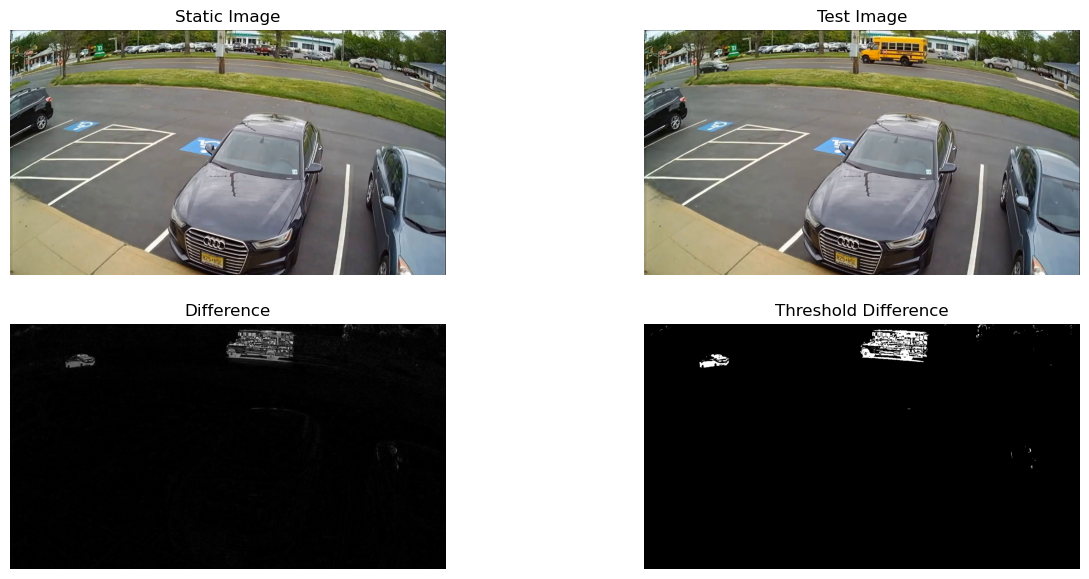

In [11]:
image_path1 = 'static.png'
image_path2 = 'test.png'

image1, gray_image1 = load_and_preprocess(image_path1)
image2, gray_image2 = load_and_preprocess(image_path2)

# subtract the images
diff, thresh = subtract_images(gray_image1, gray_image2)

# plot the images
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Static Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Test Image')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Difference')
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Threshold Difference')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()

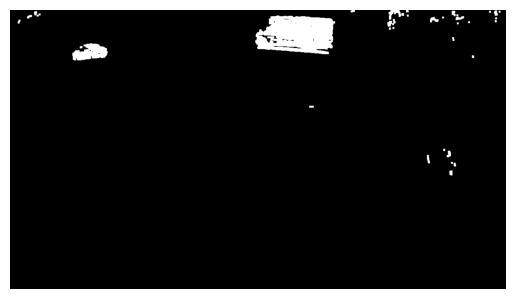

In [12]:
dilated_image = cv2.dilate(thresh, None, iterations=2)
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
cnts = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cnts

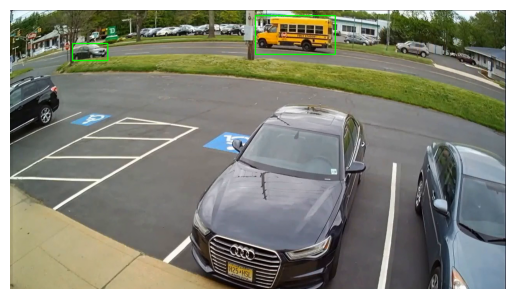

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image2' is your processed image and 'cnts' is the list of contours

# Iterate the contours
for c in cnts:
    if cv2.contourArea(c) < 700:
        continue

    # Get the bounding box coordinates
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR image to RGB
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the image in Jupyter Notebook
plt.imshow(image2_rgb)
plt.axis('off')  # Hide axes
plt.show()